# Neural Network From Scratch

:::{contents}
:::

- This section provides an introduction to the fundamentals of neural network mechanisms, specifically within the context of deep learning.

- We will break our discussions into three main parts:
    - Building A Neural Network (How does the network work?)
        - Forward Propagation
        - Weights, Biases, and Activation functions
        - Matrix multiplication
    - Learning and Training (How does it learn?)
        - Loss Function
        - Gradients
        - Derivatives and Partial Derivatives
        - Gradient Descent
    - Gradient Descent (More on how does it learn.)
        - Batch
        - Mini-batch
        - Stochastic gradient descent

In [1]:
## Loading Dependencies
import numpy as np
import matplotlib.pylab as plt

## Workflow of Neural Network

![](../images/nn-flowchart.png)

## Neural Network Overview

### Deep Learning

![](../images/neural-network-propagation.gif)

### Forward Propagation
- Neural network is a type of machine learning algorithm modeled on human brains and nervous system.
- The model is believed to process information in a similar way to the human brain:
    - inputs and weights as the **dendrites**
    - neuron operations of weighted sums and activation as **neurons**
    - outputs as **axons**
- A neural network often consists of a large number of elements, known as **nodes**, working in parallel to solve a specific problem. These nodes are often organized into different **layers**.
- Each layer of the network transforms the input values into the output values based on the weights (parameters) of the nodes.
- The data transformation from the input to the output is in general referred to as **forward propagation** of the network.

### Backward Propagation

- When the predicted output is compared with the true label, we can evaluate the network performance by computing the **loss** of the network.
- Then we determine the proportion of the losses that may be attributed to each model parameter. This process goes from the losses of the predicted output backward to the original inputs. This step is referred to as the **back propagation** of the network.

### Neurons

- Neural network consists of neurons, which allow us to model non-linear relationships between input and output data.
- Given an input vector, traditional linear transformation can only model a linear relationship between X and y: 

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2x_2 + w_3x_3 +...+w_nx_n
$$

- A neron is like a linear transformation but with an extra **activation function**.
- This mechanism of activation function in each neuron will ultimately determine the output of the neuron.

$$\begin{align}
\textit{Neuron Output Value} & =  h(\hat{y}) \\
& = h(w_0 + w_1 x_1 + w_2x_2 + w_3x_3 +...+w_nx_n)
\end{align}$$

![](../images/neuron.png)

### Activation Functions

- In neural network, the activation function of a node determines whether the node would activate the output given the **weighted sum of the input values**. 

- Different types of activation functions may determine the cut-offs for output activation in different ways.

- **Sigmoid** function: This function converts the $y$ values into values within the range of 0 and 1 (i.e., a probability-like value).

$$ h(y) = \frac{1}{1 + \exp(-y)}$$

- **Step** function: This function converts the $y$ values into binary ones, with only the positive values activated.

$$ h(y)= \left\{ 
     \begin{array}\\
     0 & (y \leq 0) \\
     1 & (y > 0)
     \end{array}
\right.
$$

- **ReLU** (Rectified Linear Unit) function: This function converts the $y$ values by passing only positive values and zero for negative $y$.

$$ h(y)= \left\{ 
     \begin{array}\\
     y & (y > 0) \\
     0 & (y \leq 0)
     \end{array}
\right.
$$

- **Softmax** function: This function converts the $y$ values into normalized probability values.

$$
h(y_k) = \frac{\exp(y_k)}{\sum_{i = 1}^{n} \exp({y_i})}
$$

### Activation Functions in Python

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


# def softmax(x):
#     exp_x = np.exp(x)
#     sum_exp_x = np.sum(exp_x)
#     y = exp_x/sum_exp_x
#     return y


def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)  # avoid overflow issues
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

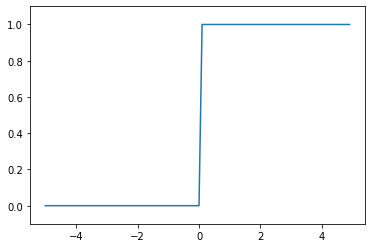

In [3]:
# step function
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function(x))
plt.ylim(-0.1, 1.1)
plt.show()

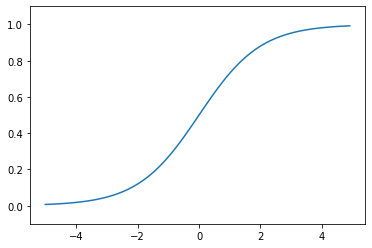

In [4]:
## sigmoid function
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)
plt.show()

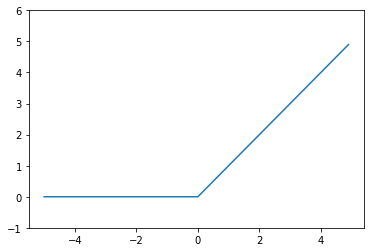

In [5]:
# ReLU
plt.plot(x, relu(x))
plt.ylim(-1, 6)
plt.show()

In [6]:
x = [2, 5, 7, 10]
print(np.round(softmax(x),2))

[0.   0.01 0.05 0.95]


### From Nodes to Layers

- A neural network can be defined in terms of **depths** and **widths** of its layers.
    - **Depth**: How many layers does the network have?
    - **Width**: How many neurons does each layer have?
- A network can consist of several layers.
- Each layer can have various numbers of neurons.
- For each layer, the shape of the input tensor, the number of its neurons, and the shape of its output are inter-connected. These settings will determine the number of parameters (i.e., **weights**) needed to train.


![](../images/neural-network-dense-layer.gif)

### Layer, Parameters, and Matrix Mutiplication (Self-Study)

- Each layer transforms the input values into the output values based on its layer parameters.
- Mathematically, these values transformation is a matrix multiplication, running in parallel for all nodes of the layer.
- In Deep Learning, the input and output values are represented as a multi-dimensional tensor.
    - A 1D tensor is a vector.
    - A 2D tensor is a two-dimensional array.
    - A 3D tensor is a three-dimensional array.

![](../images/neural-network-dense-layer-1.gif)

![](../images/neural-network-dense-layer-2.gif)

### Types of Neural Networks

- **Multi-Layer Perceptron** (Fully Connected Network)
    - Input Layer, one or more hidden layers, and output layer.
    - A hidden layer consists of neurons (perceptrons) which process certain aspect of the features and send the processed information into the next hidden layer.
    

- **Convolutional Neural Network (CNN)**
    - Mainly for image and audio processing
    - Convolution Layer, Pooling Layer, Fully Connected Layer

- **Sequence Models**
    - A sequence model is a type of machine learning model designed to handle sequential data, where the order of elements matters. In a sequence model, input data is processed in a sequential manner, and the model makes predictions or decisions based on the sequence of input elements.
    - Common variants: Recurrent Neural Network (RNN), Long Short-Term Memory Networks (LSTM), Gate Recurrent Units (GRU), Transformers
    - **Preferred methods in NLP**: Sequence models are widely used in NLP tasks due to their ability to handle sequential data, such as text. They are well-suited for tasks like language modeling, sentiment analysis, machine translation, and text generation.
    - **Memory of previous steps**: Unlike other fully-connected networks, which process each input independently, RNNs have the ability to retain information about previous steps in the sequence. This allows them to learn from the context of the data and make decisions based on this context. This capability is crucial for tasks where the current input's meaning depends on the sequence of previous inputs, such as in language understanding.
    - **Effective in dealing with time-series data**: Sequence models excel in processing time-series data, where the order of data points matters. In the context of NLP, text can be viewed as a sequence of words or characters, and sequence models can effectively capture the dependencies between these elements. This makes them well-suited for tasks like language modeling, where predicting the next word in a sentence depends on the words that came before it.

![](../images/s2s-rnn.jpeg)

## Building a Neural Network Model in Python

### Packages in Focus

- `tensorflow`: It is an open source machine learning library used for numerical computational tasks developed by Google.
- `tensorflow.keras`: It is a high level API built on top of Tensorflow. It originated as an independent library and now has been incorporated as part of Tensorflow 2+.
- `keras 3.0`: Now Keras 3.0 is a full rewrite of Keras that enables you to run Keras workflows on top of several popular deep learning packages, such as JAX, TensorFlow, or PyTorch. 

:::{important}

Moving from Keras 2 to Keras 3 is generally smooth and backward compatible, with most users not needing to modify their code. However, in this course, we will stay with keras 2 for the commment. 

If accessing Keras via `tf.keras` in TensorFlow, there are no immediate changes until TensorFlow 2.16. From TensorFlow 2.16 onwards, Keras 3 is the default. 

If you are using TensorFlow > 2.15, to continue using Keras 2, install `tf_keras` and set the environment variable `TF_USE_LEGACY_KERAS=1`. This will direct TensorFlow to resolve `tf.keras` to the locally-installed `tf_keras` package. However, be cautious as this change affects any package importing `tf.keras` in the Python process. To ensure changes only impact your own code, use the `tf_keras` package.
:::

- Usually we need to define the architecture of the neural network model in terms of **depths** and **widths** of the layers.
- After we define the structure of the network and initialize the values for all parameters, the training requires an iterative processing involving:
    - **Forward Propagation**: It refers to the process of transforming the data values by moving the input data through the network to get output.
    - Define your **loss function**.
    - Calculate **Total Error** based on the loss function.
    - Calculate **Gradients** via **Back Propagation**
    - Update the **weights** based on gradients.
    - Iterate the process until the stop-condition is reached.

:::{info}
I highly recommend the article, [PyTorch vs TensorFlow vs Keras: The Ultimate Showdown in Deep Learning Frameworks](https://blog.mirkopeters.com/pytorch-vs-tensorflow-vs-keras-the-ultimate-showdown-in-deep-learning-frameworks-75db6d8f6a0b), which discusses the strengths and weaknesses of common DL pakcages (esp. PyTorch, Tensorflow, Keras).

One highlight from the above article:

> TensorFlow’s extensive ecosystem and PyTorch’s user-friendly nature offer distinct advantages, while Keras’ high-level abstraction over TensorFlow makes it exceptionally approachable for beginners in deep learning. Each framework’s design philosophy not only influences its features and capabilities but also shapes the learning curve and development experience.

:::

### Create Model

- In `tensorflow.keras`, we can create models in two ways:
    - Sequential API (`keras.Sequential`)
    - Functional API (`keras.model`)

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [3]:
## Sequential API to create model
model = keras.Sequential()
model.add(keras.Input(shape=(2)))
model.add(layers.Dense(4, activation="relu", name="dense_layer_1"))
model.add(layers.Dense(2, activation="relu", name="dense_layer_2"))

# Sequential API (Another alternative)
# model = keras.Sequential(
#     [
#         keras.Input(shape=(2)),
#         layers.Dense(4, activation="relu"),
#         layers.Dense(2, activation="relu")
#     ]
# )

In [4]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape=(2,))
x = layers.Dense(4, activation="relu", name="dense_layer_1")(inputs)
outputs = layers.Dense(2, activation="relu", name="dense_layer_2")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

:::{tip}
If you create the model using the `Sequential()` method, you will not be able to check the `model.summary()` or `plot_model()` until the model has been compiled and fitted.
:::

- Two ways to inspect the model architecture:
    - `model.summary()`: A printed summary of the model structure
    - `tensorflow.keras.utils.plot_model(model)`: A visual representation of the model structure

In [5]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_layer_1 (Dense)       (None, 4)                 12        
                                                                 
 dense_layer_2 (Dense)       (None, 2)                 10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


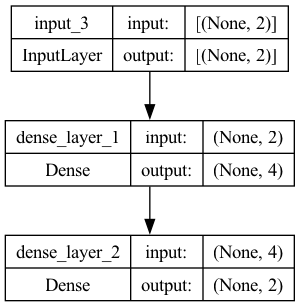

In [6]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

:::{note}
If you see error messages when running the `plot_model()`, please follow the instructions provided in the error messages and install:

- `pip install pydot`
- Install [graphviz](https://graphviz.gitlab.io/download/) (choose the installation methods depending on your OS).
:::

### Useful Modules in keras

#### `keras.utils`
    
- `to_categorical()`: To convert a class/label list into a one-hot encoding matrix
- `plot_model()`: Plot the model structure

In [7]:
from keras.utils import to_categorical

labels = ["X", "X", "Y", "Y", "Z", "Z"]

In [8]:
## Text Labels to Sequences
labels_dict = {x: i for i, x in enumerate(set(labels))}
labels_int = [labels_dict[l] for l in labels]

In [9]:
print(labels_int)

[1, 1, 0, 0, 2, 2]


In [10]:
## Sequences to One-Hot Encoding
to_categorical(labels_int)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

####  `keras.layers`

- Base layers: `Input`, `Dense`, `Embedding`
- Pooling layers: `MaxPooling`, `AveragePooling`, `GlobalMaxPooling`, `GlobalAveragePooling`
- Recurrent layers: `SimpleRNN`, `LSTM`, `GRU`, `Bidirectional`
- Regularization layers: `Dropout`
- Attention layers: `Attention`, `AdditiveAttention`, `MultiheadAttention`
- Reshaping: `Flatten`
- Merging: `Concatenate`


#### Other modules

- `keras.losses`: Loss functions
- `keras.optimizers`: Optimization is an important process which optimizes the input weights by comparing the prediction and the loss function.
    - `keras.optimizers.RMSprop`: RMSprop is an optimization algorithm that uses a moving average of squared gradients to normalize the gradient updates.
    - `keras.optimizers.Adam`: Adam is an optimization algorithm that adapts the learning rate based on the historical gradient information.
    - `keras.optimziers.SGD`: Stochastic Gradient Descent (SGD) is a simple optimization algorithm that updates the parameters by computing the gradient of the loss function with respect to the parameters.
- `keras.metrics`: Metrics for model evaluation

## A Quick Example

![](../images/keras-workflow.png)

- Steps for Model Training
    - Create model
    - Compile model
    - Fit model
    - Evaluate model
    - Predict 

### Pseudo Data

- We create random samples, where each sample is characterized by two random numbers (e.g., grades in subjects)
- Each sample is also labeled with a binary class label (e.g., `fail = 0` or `pass = 1`)
- We create three datasets: **training**, **validation**, and **testing** sets.

In [12]:
import numpy as np
np.random.seed(123)

# train set
x_train = np.random.random((100, 2))
y_train = np.random.randint(0, 2, (100, ))

# val set
x_val = np.random.random((100, 2))
y_val = np.random.randint(0, 2, (100, ))

# test set
x_test = np.random.random((100, 2))
y_test = np.random.randint(0, 2, (100, ))

In [13]:
print(x_train.shape)
print(y_train.shape)

(100, 2)
(100,)


In [14]:
print(x_train[:5, ])
print(y_train[:5])

[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]
 [0.9807642  0.68482974]
 [0.4809319  0.39211752]]
[1 1 0 1 0]


### Model Training

In [34]:
## create model
model = keras.Sequential()
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [35]:
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

:::{info}
There are more alternative metrics for evaluation. Please read [Keras Metrics](https://keras.io/api/metrics/accuracy_metrics/) for more detail.
:::

- **epochs**: the number of times that the entire training set is passed forward and backward through the neural network.
- **batch_size**: the number of samples that are used for parameter updates each time (i.e., passed through the network forward and backward)

If we specify `batch_size = 10` and `epochs=50`, the model will try to train the model parameters (i.e., all the weights in the layers) by running through the entire training set **50** times (epochs, or iterations).

And in each epoch, the model will update the model parameters according to the average loss values based on a batch of **10** samples.

In [36]:
# fit
history = model.fit(x_train,
                    y_train,
                    batch_size=10,
                    epochs=50,
                    validation_data=(x_val, y_val))

Epoch 1/50


10/10 [==============================] - 0s 8ms/step - loss: 0.7034 - accuracy: 0.4800 - val_loss: 0.6988 - val_accuracy: 0.4700
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4700 - val_loss: 0.6963 - val_accuracy: 0.4400
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4400 - val_loss: 0.6939 - val_accuracy: 0.5100
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5700 - val_loss: 0.6928 - val_accuracy: 0.5200
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5400
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5200 - val_loss: 0.6920 - val_accuracy: 0.5400
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5200 - val_loss: 0.6922 - val_accuracy: 0.5400
Epoch 8/50
10/10 [=============

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (10, 16)                  48        
                                                                 
 dense_7 (Dense)             (10, 16)                  272       
                                                                 
 dense_8 (Dense)             (10, 1)                   17        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


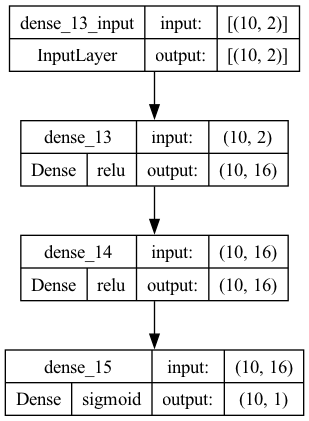

In [37]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

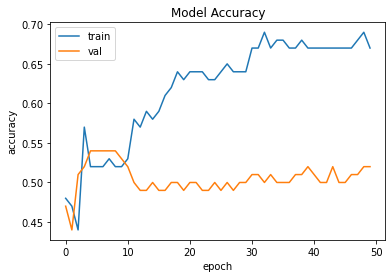

In [38]:
## Plot accuracy changes from model.fit()
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

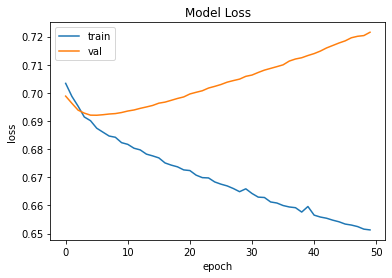

In [39]:
## Plot loss changes from model.fit()
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluation and Prediction

In [41]:
## Evaludate
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 874us/step - loss: 0.7519 - accuracy: 0.4200


[0.7519487738609314, 0.41999998688697815]

In [43]:
## Predict

## generate pseudo test data
x_new = numpy.random.random((5, 2))

## check
model.predict(x_new)

1/1 [==============================] - 0s 9ms/step


array([[0.535356  ],
       [0.5599342 ],
       [0.6352474 ],
       [0.38696763],
       [0.4239076 ]], dtype=float32)

## Loss Functions

### How does the neural network learn the parameters?

- Forward propagation shows how the network takes the input values, transforms them, and produces the predicted output values based on the network parameters (i.e., weights).
- The network needs to learn the weights that best produce the output values according to some **loss function**, i.e., how different is the prediction from the true label?
- Crucially, we need to compute the differences between the **predicted** outputs of the network and the **true** target outputs. 
- The model should aim to minimize these differences, which are commonly referred to as **errors** of the model.


### Loss Functions

- If the target ouputs are numeric values, we can evaluate the errors (i.e., the differences between the actual model outputs and the target outputs) using the **mean square error** function.
    - Mean Square Error: $E = \frac{1}{2}\sum(y_k - t_k)^2$
- If the target outputs are labels, we can evaluate the errors (i.e., the differences between the actual model labels and the target labels) using the **cross entory error** function.
    - Cross Entropy Error: $E= -\sum_{k}t_k\log(y_k)$
- The function used to compute the errors of the model is referred to as the **loss function**.

### Principles for Loss Functions

Problem Type | Last-Layer Activation | Loss Function in Keras| `y` Encoding |
--|--|--|--|
Binary Classification | sigmoid | `binary_crossentropy()`| Integer Encoding |
Binary/Multiclass Classification | softmax | `SparseCategoricalCrossentropy(from_logits=False)`| Integer Encoding |
Multiclass Classification | softmax | `categorical_crossentropy()`| One-hot Encoding |
Regression|None|`mes`| Floating-point|



:::{tip}
For multi-class classification, as long as the label is in **integer** encodings, then we use the `sparse_categorical_crossentropy` for loss; if the label is in **one-hot** encodings, then we use the `categorical_crossentropy` for loss.

For more information about loss functions, please check [Keras Losses](https://keras.io/api/losses/).
:::

## Categorical Variables Encoding

### What's wrong with categorical variables?

- Before we look at the examples of loss computation, we need to talk about the ways of encoding **categorical** labels.
- Remember, machine doesn't understand characters. If we have class labels like male/female, positive/negative, or each word tokens, we may need to convert these strings into machine-readable numerical values.
- This step is called **encoding**.
- Most importantly, machine learning and deep learning both require input and output variables to be **numbers**.

### Three Ways of Encodings

- **Integer** (Sequence) Encoding: Each unique label is mapped to an integer
- **One-hot** Encoding: Each unique label is mapped to a binary vector
- **Embeddings** Encoding: Each unique label is mapped to a learned vectorized representation (i.e., embeddings)

### Steps

- Given a corpus, we can create its **vocabulary** (at the word-token level, or sometimes at the character level).
- We can associate every word type with a **unique integer index** (i.e., integer encoding).
- We can further turn this integer index $i$ into a **binary vector** of size $N$ (the size of vocabulary). The vector is all zeros except for the $i$th entry, which is 1 (i.e., one-hot encoding).
- We can turn the integer index into a **dense, low-dimensional floating-point vectors** (i.e., embedding encoding).
    - Learn embeddings jointly with the main task (i.e., `Embedding` layer)
    - Use pretrained word embeddings that were precomputed using a different machine learning task.

In [26]:
## Given Label
labels = ['male', 'female', 'female', 'male']

## Create Dictionary
labels_dict = { x:i for i,x in enumerate(set(labels))}
print(labels_dict)

## Integer Encoding
labels_int = [labels_dict[l] for l in labels]
print(labels_int)

## One-hot Encoding
labels_oh = keras.utils.to_categorical(labels_int)
print(labels_oh)

{'female': 0, 'male': 1}
[1, 0, 0, 1]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [27]:
###########################################
## Integer Encoding and One-hot Encoding ##
## Using sklearn                         ##
###########################################

## Integer Encoding
from sklearn.preprocessing import OrdinalEncoder
labels = ['male', 'female', 'female', 'male']
labels = np.array(labels).reshape(-1, 1)

oe = OrdinalEncoder(dtype='int16')
labels_int = oe.fit_transform(labels)
print(labels_int)

## One-hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels_ohe = ohe.fit_transform(labels)

print(labels_ohe.toarray())

[[1]
 [0]
 [0]
 [1]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


### One-hot Encoding and Loss Function

- With one-hot encoding, we can convert any categorical variable into a numeric vector. 
- And if we specify our network output to be a vector of the same size, we can compute the differences between the output vector and the true numeric vector.

- When the target class label is a binary one (e.g., name-gender prediction):

![](../images/neural-network-loss-binary.jpeg)

- When the target class label is a multi-level one (e.g., next-word prediction):
![](../images/neural-network-loss-multicat.jpeg)

## Examples of Loss Errors (skipped)

### Error based on One Sample

- The following is a simple example showing how to compute the loss for a case of prediction.

In [28]:
def mean_square_error(y, t):
    return (0.5 * np.sum((y - t)**2))


def cross_entropy_error(y, t):
    delta = 1e-7  # avoid log(0)
    return -np.sum(t * np.log(y + delta))

In [29]:
## mean square error
y = [0.1, 0.05]  # predicted values
t = [1, 0]  # true label
print(mean_square_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y), np.array(t)))

0.40625
2.302584092994546


### Errors based on Batch Samples

- The following is a simple example showing how to compute the average loss of a sample of batch size N cases.

- If the training is based on a sample of batch size *N*, we can compute the average loss (or total errors) of the batch sample:

$$ E = - \frac{1}{N}\sum_n\sum_k t_{nk}\log y_{nk}$$

- We can revise the `cross_entropy_error()` function to work with outputs from a min-batch sample.

In [30]:
# adjust the function to for batch sample outputs
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- When the labels uses one-hot encoding, the function can be simplified as follows:

In [31]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    # because for one-hot labels
    # cross-entropy sums only the values of the true labels `1`
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## Gradient Descent

### How do we adjust the model parameters?

- Now that we have the **Loss Function**, we're ready for the crucial step in model training — tweaking the **weights** (or **parameters**) of the model.
- Essentially, in neural network training, we want to understand how adjusting each **parameter** (like weights) impacts the overall **Loss Function**. In other words, we need to know: how much does changing a specific **parameter** affect the total error?
- This understanding helps us identify the contribution of each parameter to the total error. This knowledge forms the foundation for making adjustments to the parameters.
- Our goal is to tweak the weights in proportion to their impact on the error.
- This optimization process of finding the best combination of weights to minimize the loss function is known as **Gradient Descent**.

### Gradients

- The error that a specific weight is responsible for is referred to as the **gradient** of the parameter.
- Mathematically, the gradient of a weight is the **partial derivative** of a weight in relation to the **loss function**.
- Then we adjust the weight in proportion to its gradient:

$$
{W}_{new} = W_{original} + \eta \times \textit{Gradient}_{W_{original}}
$$

- The $\eta$ is a hyperparameter in deep learning. This parameter controls how fast the model learns. This $\eta$ is referred to as the **learning rates**.
- Common values for learning rates typically fall within the range of 0.1 to 0.0001.
- It's often recommended to start with a learning rate around 0.001 and then adjust it based on the performance of the model during training.

:::{note}
:class: dropdown

- **Derivative**:
   - A derivative measures how a function changes as its input changes. 
   - For a one-variable function, the derivative at a specific point gives the slope of the tangent line to the function's graph at that point.
   - In essence, it tells you the rate at which the function is increasing or decreasing at that particular point.
   - Mathematically, the derivative of a function $f(x)$ with respect to $x$ is denoted as $f'(x)$ or $ \frac{{df}}{{dx}}$.

- **Partial Derivative**:
   - A partial derivative is similar to a derivative, but it's used for functions with multiple variables.
   - When you have a function of multiple variables (e.g., $f(x, y)$), taking the partial derivative with respect to one variable (e.g., $ x $) means you're looking at how the function changes when only that variable changes, while keeping other variables constant.
   - For example, if you have a function $ f(x, y) $ representing the surface of a mountain, the partial derivative with respect to $ x $ would tell you how the slope changes in the east-west direction, while keeping $ y $ constant.
   - Mathematically, the partial derivative of a function $ f(x, y) $ with respect to $x$ is denoted as $ \frac{{\partial f}}{{\partial x}} $.

- **Gradient**:
   - The gradient represents the direction and magnitude of the steepest increase of a function. 
   - In simpler terms, imagine you're standing on a hill represented by a mathematical function. The gradient tells you which direction to move in to climb the hill as quickly as possible.
   - Mathematically, the gradient of a function is a vector that consists of partial derivatives with respect to each variable in the function.

:::

### Intuition of Gradients: An Example (skipped)

- Let's assume that we are training a model with two parameters, $x_0$ and $x_1$, and the loss function is $f(x_0, x_1)$.
    - When a function includes more than one parameters, we can compute the partial derivative of the function with respect to each parameter.
    - When all partial derivatives are concatenated into a vector, this vector is called the **gradient**.
    - That is, for the above loss function with two parameters (e.g., $f(x_0, x_1) = \beta x_0 + \beta x_1$), we can calculate the partial derivatives of each parameter all at once,and represent them in a vector, which is referred to as **gradient**, i.e:
$
(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})
$

- Each parameter estimation value pair, $(x_0,x_1)$, should correspond to a gradient.

- Intuitive understanding of the gradient:
    - The gradient of a specific $(x_0,x_1)$ indicates how the changes of the parameter values $(x_0,x_1)$ may contribute to the change of the loss function, $f(x_0,x_1)$. 
    - The gradient of a specific $(x_0,x_1)$ is a **vector**, which points at the **global minimum** of the loss function.
    - The farther the $(x_0,x_1)$ is way from the global minimum, the larger the gradient vector.
    
- In Deep Learning, the training goes as follows:
    - We initialize the parameters $x_0,x_1$ with some values $p_0, p_1$;
    - We compute the loss function $f(x_0,x_1)$
    - We compute the gradient of $f(x_0,x_1)$ when the parameter $x_0 = p_0$ and $x_1 = p_1$
    - We use the gradient to determine how to update/modify all the model parameters, i.e., 
    
$$
x_0 = x_0 + \eta\frac{\partial f}{\partial x_0} \\
x_1 = x_1 + \eta\frac{\partial f}{\partial x_1} 
$$

- The $\eta$ is again **learning rate** (e.g., 0.001).

### Types of Gradient Descent

- **Batch** Gradient Descent: Update the model weights after one epoch of the entire training set.
- **Stochastic** Gradient Descent (SGD): Update the model weights after every instance of the training set (online).
- **Mini-batch** Gradient Descent: Update the model weights after a subset of the training set. (Recommended!)

![](../images/dl-gradient-stochastic.gif)

![](../images/dl-gradient-mini.gif)

![](../images/dl-gradient-batch.gif)

### Gradients in Python (skipped)

In the following graph, each vector represents the gradient at a specific $(x_0, x_1)$, i.e., when $x_0 = p_0$ and $x_1 = p_1$:

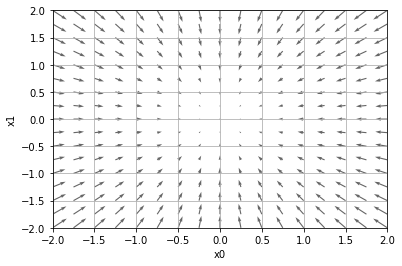

In [32]:
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## Overfitting and Underfitting


### Optimization vs. Generalization

- ML is always dealing with the tension between **optimization** and **generalization**.
    - Optimization: the process of adjusting a model to get the best performance possible on the training data (i.e., to minimize the *bias* of the model)
    - Generalization: the performance of the model on data it has never seen before (i.e., to minimize the **variation** of the model performance on different datasets.)

### Overfitting/Underfitting

- During the training stage, if both the losses on training data and validation data are dropping, the model is **underfit** and in a way to be better fit. (Great bias, Small variation)
- During the training, if the loss on the validation data stalls while that of the training data still drops, the model starts to **overfit**. (Small bias, Great variation)

### How to Deal with Underfitting?

- Increase model complexity
- Adding more training data
- Train for more epochs
- Change learning rates
- Add weight **Regularization**
- Add **dropout**

### How to Deal With Overfitting?

- Get more training data
- Reduce the complexity of the network (e.g., number of layers/nodes)
- Add weight **Regularization**
- Add **dropout**
- Batch normalization

### Regularization

- What is **regularization**?
    - Modulate the quantity of information that the model is allowed to store
    - Add constraints on what information the model is allowed to store
- Weight regularization is to add to the loss function of the network a **cost** associated with having large weights.
- That is, large weights will have greater penalties to the loss function, hence discouraged.
- Common methods:
    - L1 regularization: the cost added is proportional to the **absolute values** of the weights (`keras.regularizer.l1()`)
    - L2 regularization: the cost added is propositional to the **square values** of the weights (`keras.regularizer.l2()`)

### Dropout

- Dropout consists of randomly dropping out a number of output features of the applied layer during training.
- The dropout rate is the **fraction** of the features that are **zeroed out**. 
- The dropout rate is usually set between 0.2 and 0.5.
- In `keras`, it can an independent layer, `keras.layers.dropout()`, or paremters to be set within specific layers (e.g., `keras.layers.LSTM()`).

:::{note}
Check [Keras Regularization Layers](https://keras.io/api/layers/regularization_layers/) for more information (You can find `dropout()` layer here).

Also, check [Keras Layer weight regularizers](https://keras.io/api/layers/regularizers/) for more information about the layer-specific regularization.
:::

### Heuristics for Regularization

- Applying dropout before a recurrent layer hinders learning rather than helping with regularization. Instead, dropout is typically applied after recurrent layers, allowing the model to capture temporal dependencies more effectively. This approach helps prevent overfitting by adding noise to the activations of the recurrent units during training, encouraging the network to learn more robust representations.
- The same dropout mask (the same pattern of dropped units) should be applied at every time step, instead of a dropout mask that varies randomly from timestep to timestep. (Yarin Gal)
- In order to regularize the representations formed by the recurrent gates of layers (e.g., LSTM and GRU), a temporally constant dropout mask should be applied to the inner activations of the layer (a recurrent dropout mask). (Yarin Gal)

```python
## pseudo code

from keras.models import Sequential
from keras.layers import LSTM

# Define the model
model = Sequential()

# Add an LSTM layer with recurrent dropout
model.add(LSTM(units=64, recurrent_dropout=0.2, input_shape=(timesteps, features)))

# Add more layers as needed
# model.add(...)
# model.add(...)

# Compile the model and specify the loss function, optimizer, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using model.fit(...)
```

### Normalization

- **Normalization** is to make sure that sets of numeric values are of a uniform scale (e.g., 0 to 1).
- If the dataset contains numeric data varying in a huge range, it will skew the learning process, resulting in a bad model.
- To properly add normalization layers can help speed up the model convergence for more effective training.

### Batch Normalization and Layer Normalization

- In Batch Normalization, input values of the same neuron for all the samples in the mini-batch are normalized.
- In Layer Normalization, input values for all neurons in the same layer are normalized for each data sample.
- Heuristics
    - Batch Normalization depends on mini-batch size while Layer Normalization doesn't.
    - Batch Normalization works better with CNN while Layer Normalization works better with RNN.

:::{note}
Check [Keras Normalization Layers](https://keras.io/api/layers/normalization_layers/) for more information.
:::

## Some Math (Skipped)

The following presents some important mathematical constructs related to the understanding of neural network.


### Chain Rule and Back Propagation

- Because there are many parameters in a network, we can compute the gradients (or partial derivatives) of all the weights using the chain rules of derivatives.
- Specifically, the total error is essentially broken up and distributed back through the network to every single weight with the help of chain rule:

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}.\frac{\partial y}{\partial x}$$

- This process is referred to as **back propagation**: moving back through the network, back-propagating the total errors to every single weight, and updating the weights.
- The principle of weights-updating: the larger the gradient, the more the adjustments.

$$W_1 = W_1 - \eta \frac{\partial E}{\partial W_1}$$

- The above adjustment formula suggests that the weight updates are proportional to the partial derivatives of the weight. 
- The **$\eta$** in the formula controls the amount of adjustment, which is referred to as the **learning rate**.

### Elementwise Operations of Matrix

- A two-dimensional matrix

$$ x = 
\begin{pmatrix}
1&2 \\
3&4 \\
5&6 \\
\end{pmatrix}
$$

In [33]:
x = np.array([[1, 2], [3, 4], [4, 6]])
x

array([[1, 2],
       [3, 4],
       [4, 6]])

In [34]:
print(x + 1)
print(x * 5)
print(x / 5)

[[2 3]
 [4 5]
 [5 7]]
[[ 5 10]
 [15 20]
 [20 30]]
[[0.2 0.4]
 [0.6 0.8]
 [0.8 1.2]]


- Matrix Elementwise Multiplication


$$\begin{pmatrix}
1&2 \\
3&4 \\
\end{pmatrix}
\begin{pmatrix}
5&6 \\
7&8
\end{pmatrix} =
\begin{pmatrix}
5&12 \\
21&32
\end{pmatrix}
$$



In [35]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
print(x)
print(y)
print(x * y)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[ 5 12]
 [21 32]]


### Broadcast

In matrix elementwise computation, the smaller tensor will be **broadcasted** to match the shape of the larger tensor.

- Axes (called broadcast axes) are added to the smaller tensor to match the `ndim` of the larger tensor.
- The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

$$\begin{pmatrix}
1&2 \\
3&4 \\
\end{pmatrix}
\begin{pmatrix}
10&20
\end{pmatrix} =
\begin{pmatrix}
10&40 \\
30&80
\end{pmatrix}
$$

In [36]:
x = np.array([[1, 2], [3, 4]])
y = np.array([10, 20])
print(x.shape)
print(y.shape)
xy = x * y
print(xy)
print(xy.shape)

(2, 2)
(2,)
[[10 40]
 [30 80]]
(2, 2)


### Matrices Dot Production

![](../images/matrices-dot-product.png)
(Source: Chollet [2018], Ch 2., Figure 2.5)

- The most common applications may be the **dot product** between two matrices. 
- You can take the dot product of two matrices x and y (`dot(x, y)`) if and only if `x.shape[1] == y.shape[0]`. The result is a matrix with shape (`x.shape[0]`, `y.shape[1]`), where the coefficients are the vector products between the rows of $x$ and the columns of $y$. 

$$\begin{pmatrix}
1&2 \\
3&4 \\
5&6
\end{pmatrix}
\begin{pmatrix}
5&6&7 \\
8&9&10
\end{pmatrix} =
\begin{pmatrix}
21&24&27 \\
47&54&62 \\
73&84&95
\end{pmatrix}
$$

In [37]:
x = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[5, 6, 7], [8, 9, 10]])

xy_dot = np.dot(x, y)
print(xy_dot)

[[21 24 27]
 [47 54 61]
 [73 84 95]]


### Matrices Dot Production and Forward Propagation

- For example, let's assume that we have a word, one-hot encoded as [0,1,0,0,0,0].
- An embedding model consists of parameters like the two-dimensional tensor shown below.
- The output of the model is the dot product of the input word vector and the model parameter tensor.

$$
\begin{pmatrix}
-2.8&1.6&0.9&0.7&-0.7&-1.8 \\
0.3&-2.3&0.8&1.8&1.5&0.7\\
0.9&0.3&-1.6&-2.8&0.5&0.4\\
1.8&-0.5&-1.6&-2.8&-1.7&1.7
\end{pmatrix}
\begin{pmatrix}
0\\
1\\
0\\
0\\
0\\
0\\
\end{pmatrix}=
\begin{pmatrix}
1.6 \\
-2.3 \\
0.3\\
-0.5
\end{pmatrix}
$$

In [38]:
word_one_hot = np.array([0, 1, 0, 0, 0, 0]).reshape(6, 1)
word_one_hot.shape
print(word_one_hot)
model_parameters = np.array([[-2.8, 1.6, 0.9, 0.7, -0.7, -1.8],
                             [0.3, -2.3, 0.8, 1.8, 1.5, 0.7],
                             [0.9, 0.3, -1.6, -2.8, 0.5, 0.4],
                             [1.8, -0.5, -1.6, -2.8, -1.7, 1.7]])

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [39]:
np.dot(model_parameters, word_one_hot)

array([[ 1.6],
       [-2.3],
       [ 0.3],
       [-0.5]])

### Derivatives

- Given a normal function, $f(x) = y $ , if the $x$ value changes, $y$ will change as well.
- So if we increase $x$ by a small factor $h$, this results in a small change to $y$, i.e., $f(x+h) - f(x)$.
- We can then compute the change of $y$ relative to the small change of $x$, i.e., $\frac{f(x+h) - f(x)}{h}$
- When $h$ is very very small around a certain point $p$, we can then estimate the change of $y$ at the point when  $x = p$, i.e., $\lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

- This instantaneous change of $y$ is called the **derivetaive** of $x$ in $p$. 
    - If it is negative, it means a small change of $x$ around $p$ will result in a decrease of $f(x)$ 
    - If it is positive, a small change in $x$ will result in an increase of $f(x)$. 
    - The absolute value (i.e., the magnitude) of the derivative indicates how quickly this increase or decrease will happen.
- This can be mathematically represented as follows:

$$
\frac{\partial f}{\partial x}= \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

- The **derivative** turns out to be the **slope of the tangent line** at $x = p$.
- If we are trying to update $x$ by a factor $h$ in order to minimize $f(x)$, and we know the derivative of $\frac{\partial f}{\partial x}$, we have everything we need: 
    - The derivative completely describes how $f(x)$ evolves when we change $x$. 
    - If we want to reduce the value of $f(x)$, we just need to move $x$ a little in the opposite direction from the derivative.
- In Deep Learning, the $f(x)$ is often the **loss function**, and $x$ is often the parameter of the model.
    - We initialize the parameter $x$ with some value $p$;
    - We compute the loss function $f(x)$
    - We compute the derivative of $f(x)$ when the parameter $x = p$
    - We use the derivative to determine how to update/modify the parameter, i.e., $x_{new} = x_{old} + \eta\frac{\partial f}{\partial x} $
    - The $\eta$ is commonly referred to as the **learning rate**.

In [40]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [41]:
def tangent_line(f, x):
    d = numerical_diff(f, x)  ## change of y when a very small change in x
    #print(d)
    # d turns out to be the slope of the tangent line
    y = f(x) - d * x
    return lambda t: d * t + y

- Take the derivates of the following function when x = 5 and 10:

$$y = 4x^2 + 2x$$

In [42]:
def fun_x(x):
    return 4.0 * x**2 + 2.0 * x

In [43]:
# plot the function
x = np.arange(0.0, 20.0, 0.1)
y = fun_x(x)
tf5 = tangent_line(fun_x, 5)
y5 = tf5(x)

tf10 = tangent_line(fun_x, 10)
y10 = tf10(x)

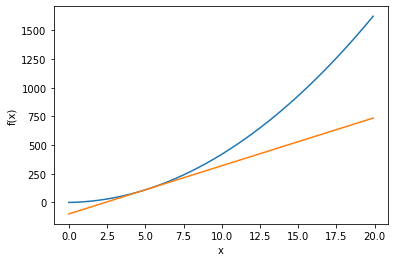

In [44]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y5)
plt.show()

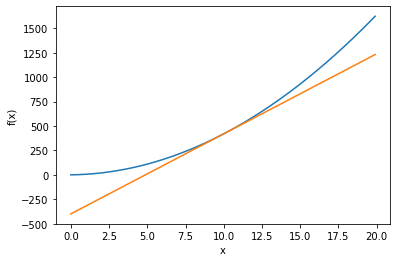

In [45]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y10)
plt.show()

In [46]:
print(
    numerical_diff(fun_x, 5)
)  # small change of x when x = 5 will slighly change y in positive direction
print(
    numerical_diff(fun_x, 10)
)  ## small change of x when x = 10 will greatly change y in positive direction

41.99999999997317
81.99999999987995


- In python, we use the **numerical differentiation** method to find the derivative of $f(x)$ when x = 5 and 10.
- We can use the **analytic differentiation** method and derive the **derivatie function** $f'(x)$ first:

$$
f'(x) = \frac{\partial f}{\partial x}= 4x^2 + 2x = 8x + 2
$$

- Numerical differentiation produces derivatives with errors; analytic differentiation produces exact derivatives.

### Partial Derivatives

- When a function has many parameters, we can take the derivate of the function with respect to one particular parameter. 
- This parameter-specific derivative is called **partial derivative**.
- Take the partial derivatives of the following function:

$$ f(x_0, x_1)=x_0^2 + x_1^2 $$

- Once if we have defined the function for the model (e.g., the Loss Function), we can calculate to what extent the change in weights would affect the change in the function.
- The partial derivative refers to how a change in a specific weight $x_1$ affects the function, i.e., the Loss Function or the total error.

$$\frac{\partial f}{\partial x_1}$$

In [47]:
## fun_2 has two variables/weights
def fun_2(x):
    return x[0]**2 + x[1]**2

- When $x_0=3$ and $x_1=4$, compute the partial derivative of $x_0$, $\frac{\partial f}{\partial x_0}$

In [48]:
def fun_2_tmp1(x0):
    return x0**2 + 4.0**2


numerical_diff(fun_2_tmp1, 3.0)

6.00000000000378

- When $x_0=3$ and $x_1=4$, compute the partial derivative of $x_1$, $\frac{\partial f}{\partial x_1}$

In [49]:
def fun_2_tmp2(x1):
    return 3.0**2 + x1**2


numerical_diff(fun_2_tmp2, 4.0)

7.999999999999119

## References

- I highly recommend the following two books for deep learning with Python:
    - [Deep Learning：用Python進行深度學習的基礎理論實作](https://www.books.com.tw/products/0010761759)
    - [Deep Learning 2｜用Python進行自然語言處理的基礎理論實作](https://www.books.com.tw/products/0010817138?loc=P_br_r0vq68ygz_D_2aabd0_B_1)
- This post collections a comprehensive list of learning resourcess for deep learning: [史上最完整機器學習自學攻略！我不相信有人看完這份不會把它加進我的最愛](https://buzzorange.com/techorange/2017/08/21/the-best-ai-lesson/).
- Taylor, Michael. (2017). Neural Networks: A Visual Introduction for Beginners. (cf. Course Data) 
